https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

# Course Work Part 2: Clustering 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## DATASET




In [2]:
import pandas as pd

XTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
YTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
XTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_test_all.csv')
YTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_test_all.csv')

In [3]:
XTrain.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302',
       '2303'],
      dtype='object', length=2304)

In [4]:
XTArr=np.array(XTrain)
YTArr=np.array(YTrain)                      

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
datatype = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
X1 = data.iloc[:,0:2304]  #independent columns
y1 = datatype.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScoresAll2 = featureScores.nlargest(2,'Score')
featureScoresAll2

,Specs,Score
1263,1263,150633.369191
1264,1264,148051.674998


## K-Means



Now let's plot them:

In [6]:
#plotting data samples in X to see the clusters. using the best 2 features
def plot_clusters(X, y=None):
    plt.scatter(X[:, 1263], X[:, 1264],c=y, s=2) #s is the size of dots.
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

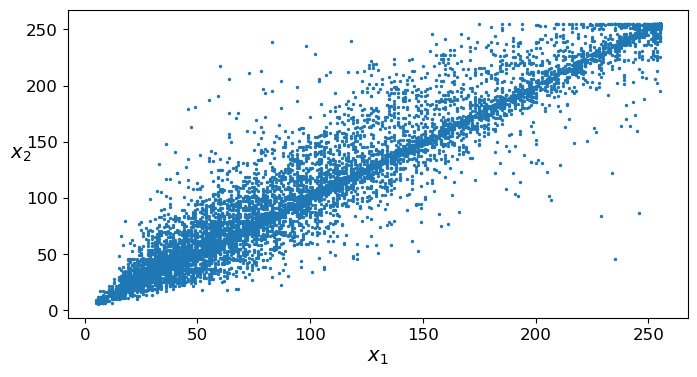

In [7]:
plt.figure(figsize=(8, 4))
plot_clusters(XTArr)
plt.show()

In [8]:
def get_best_feature_dataframe(index_X, data):
    arr = index_X.to_numpy()[:,0]    
    return data.loc[:,arr]

In [9]:
feature_df = get_best_feature_dataframe(featureScoresAll2,XTrain)
XTArrBest  = feature_df.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XTArrBest, YTArr, test_size=0.25, random_state=0)

In [11]:
#Normalise the data
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=10, n_init='auto', random_state=0)

In [13]:
X_train[1263]

array([58., 58.])

In [140]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred1 = kmeans.fit_predict(X_train_norm)

C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [141]:
max(y_pred1)


9

## Fit and Predict
Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

`fit_predict` Compute cluster centers and predict cluster index for each sample.



`kmeans.fit_predict` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict">Documentation Link</a>

In [16]:
from sklearn.cluster import KMeans

In [139]:
y_pred1

array([8, 1, 8, ..., 1, 1, 2])

Each instance was assigned to one of the 10 clusters. In the context of clustering, an instance’s label is the **index of the cluster** that this instance gets assigned to by the algorithm: this is not to be confused with the **class labels** in classification

In [19]:
y_pred1 is kmeans.labels_

True

And the following  _centroids_ (i.e., cluster centers) were estimated:

In [20]:
kmeans.cluster_centers_

array([[0.91263121, 0.40322997],
       [0.70694797, 0.70718836],
       [0.56679213, 0.82356412],
       [0.3626495 , 0.93010831],
       [0.78692847, 0.61658319],
       [0.6665196 , 0.74528868],
       [0.74125344, 0.67100032],
       [0.49038719, 0.87091878],
       [0.6202379 , 0.78421418],
       [0.84242376, 0.53777339]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [21]:
kmeans.labels_

array([8, 1, 8, ..., 1, 1, 2])

In [22]:
#X_new = np.array(XTest)
#kmeans.predict(X_new)

## Decision Boundaries

Let's plot the model's decision boundaries. This gives us a Voronoi diagram:

In [23]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

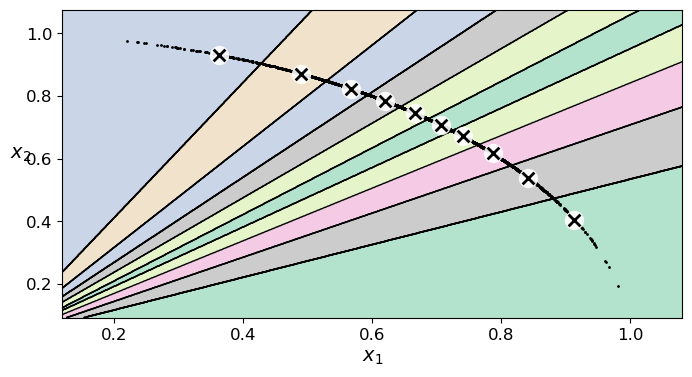

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train_norm)
plt.show()

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [27]:
kmeans_iter1 = KMeans(n_clusters=10, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=10, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=10, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X_train_norm)
kmeans_iter2.fit(X_train_norm)
kmeans_iter3.fit(X_train_norm)

C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=10, n_init=1,
       random_state=1)

And let's plot this:

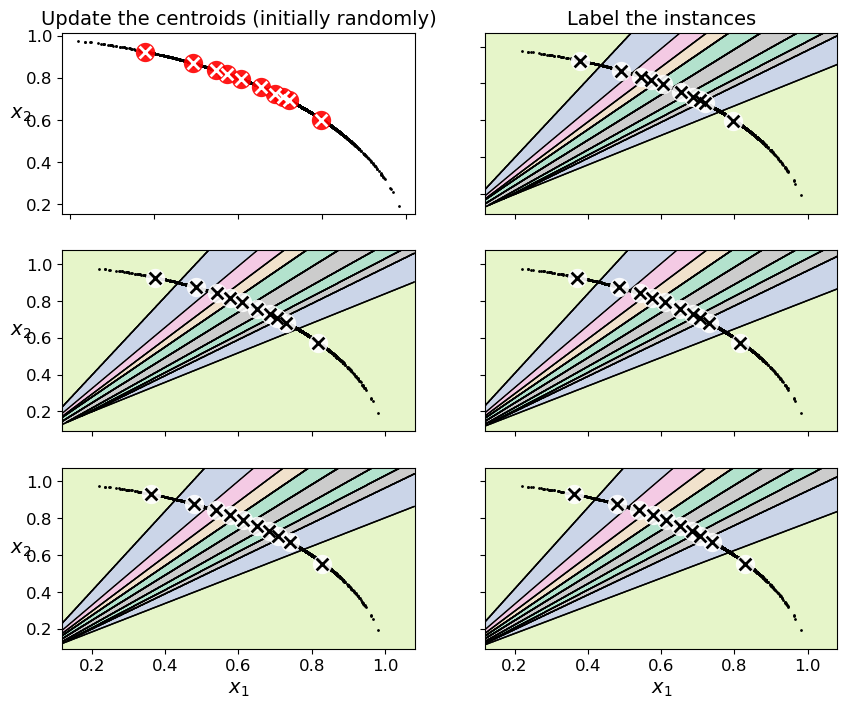

In [28]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_train_norm)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_train_norm, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_train_norm, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_train_norm, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_train_norm, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_train_norm, show_ylabels=False)

plt.show()

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [29]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


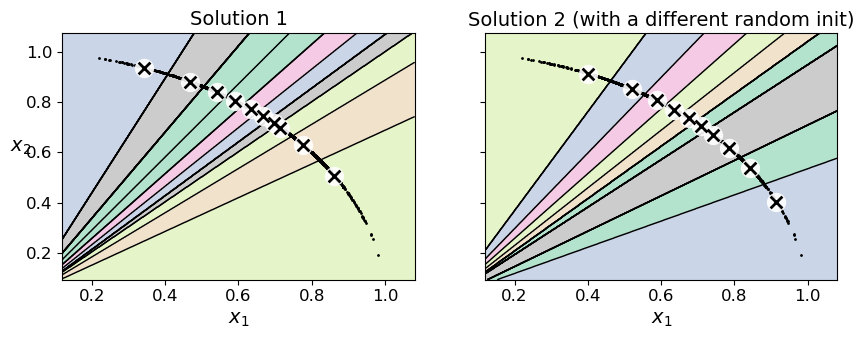

In [30]:
kmeans_rnd_init1 = KMeans(n_clusters=10, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=10, init="random", n_init=1,
                         algorithm="full", random_state=50)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X_train_norm,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [31]:
kmeans.inertia_

2.7126832455788543

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [32]:
X_dist = kmeans.transform(X_train_norm)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

2.712683245578538

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_great is better_" rule.

In [33]:
kmeans.score(X_train_norm)

-2.7126832455788548

### Multiple Initializations|

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [34]:
kmeans_rnd_init1.inertia_

3.802989646700835

In [35]:
kmeans_rnd_init2.inertia_

2.8455506256797127

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [36]:
kmeans_rnd_10_inits = KMeans(n_clusters=10, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X_train_norm)

C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=10, n_init=10,
       random_state=11)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

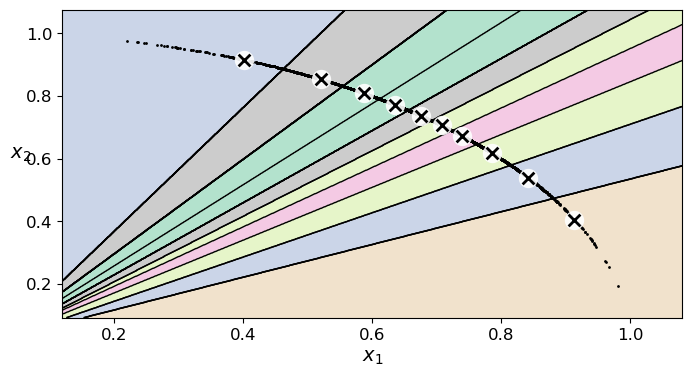

In [37]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X_train_norm)
plt.show()

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5

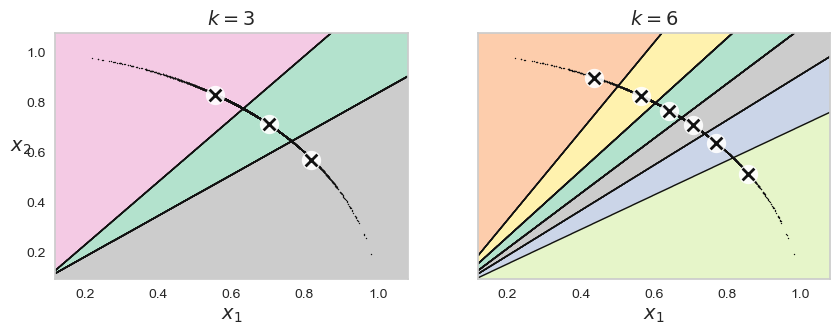

In [147]:
kmeans_k3 = KMeans(n_clusters=3, random_state=50, n_init = 'auto')
kmeans_k6 = KMeans(n_clusters=6, random_state=50, n_init = 'auto')

plot_clusterer_comparison(kmeans_k3, kmeans_k6, X_train_norm, "$k=3$", "$k=6$")
plt.show()

Ouch, these two models don't look great. What about their inertias?

In [149]:
kmeans_k3.inertia_

20.929437413027223

In [148]:
kmeans_k6.inertia_

6.629558074389893

No, we cannot simply take the value of  𝑘  that minimizes the inertia, since it keeps getting lower as we increase  𝑘 . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of  𝑘  and analyze the resulting curve:

In [146]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init = 'auto').fit(X_train_norm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

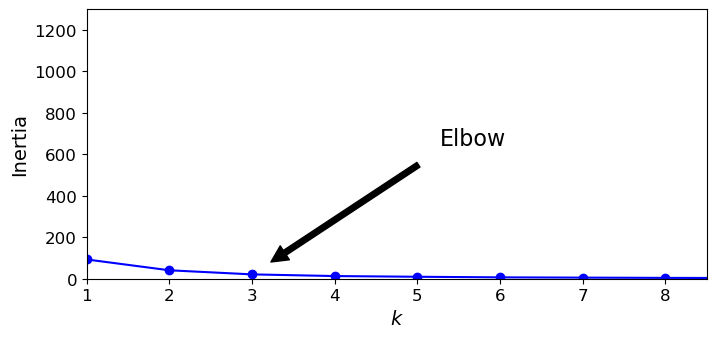

In [42]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

As you can see, there is a minor elbow at $k=3$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k > 3$  is a pretty good choice, but needs more analysis to fix k.

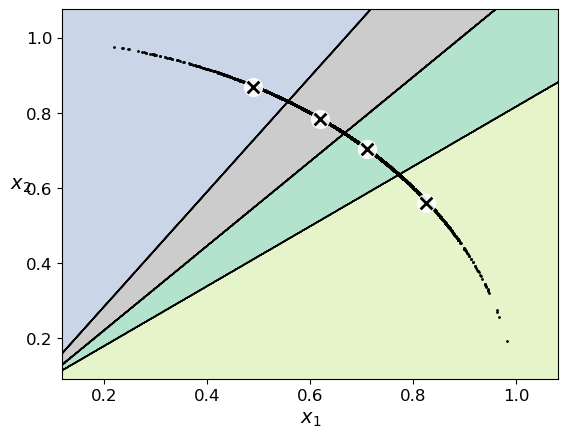

In [43]:
plot_decision_boundaries(kmeans_per_k[4-1], X_train_norm)
plt.show()

Finding the optimal number of clusters is an ongoing research problem, and you can find out more about this topic in the literature

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to 
(
b
−
a
)
/
max
(
a
,
b
)
 where 
a
 is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and 
b
 is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes 
b
, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.
Let's plot the silhouette score as a function of 
k
:

In [44]:
from sklearn.metrics import silhouette_score


In [45]:
silhouette_score(X_train_norm, kmeans.labels_) #computes the overall silhouette score 


0.6043600385117867

In [46]:
silhouette_scores = [silhouette_score(X_train_norm, model.labels_)
                     for model in kmeans_per_k[1:]]     # compute silhouette scores for different k


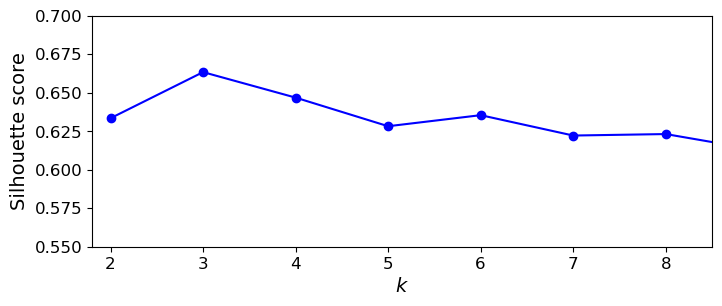

In [47]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that 
k
=
3
 is a very good choice, but it also underlines the fact that 
k
=
4
 is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram or plot as seen below

# Selecting number of clusters using silhouette plots


For n_clusters = 2 The average silhouette_score is : 0.6334430852455628
For n_clusters = 3 The average silhouette_score is : 0.6630713846449291
For n_clusters = 4 The average silhouette_score is : 0.6485598063949797
For n_clusters = 5 The average silhouette_score is : 0.6217078728883407
For n_clusters = 6 The average silhouette_score is : 0.6362000359429307
For n_clusters = 8 The average silhouette_score is : 0.6244562547559122


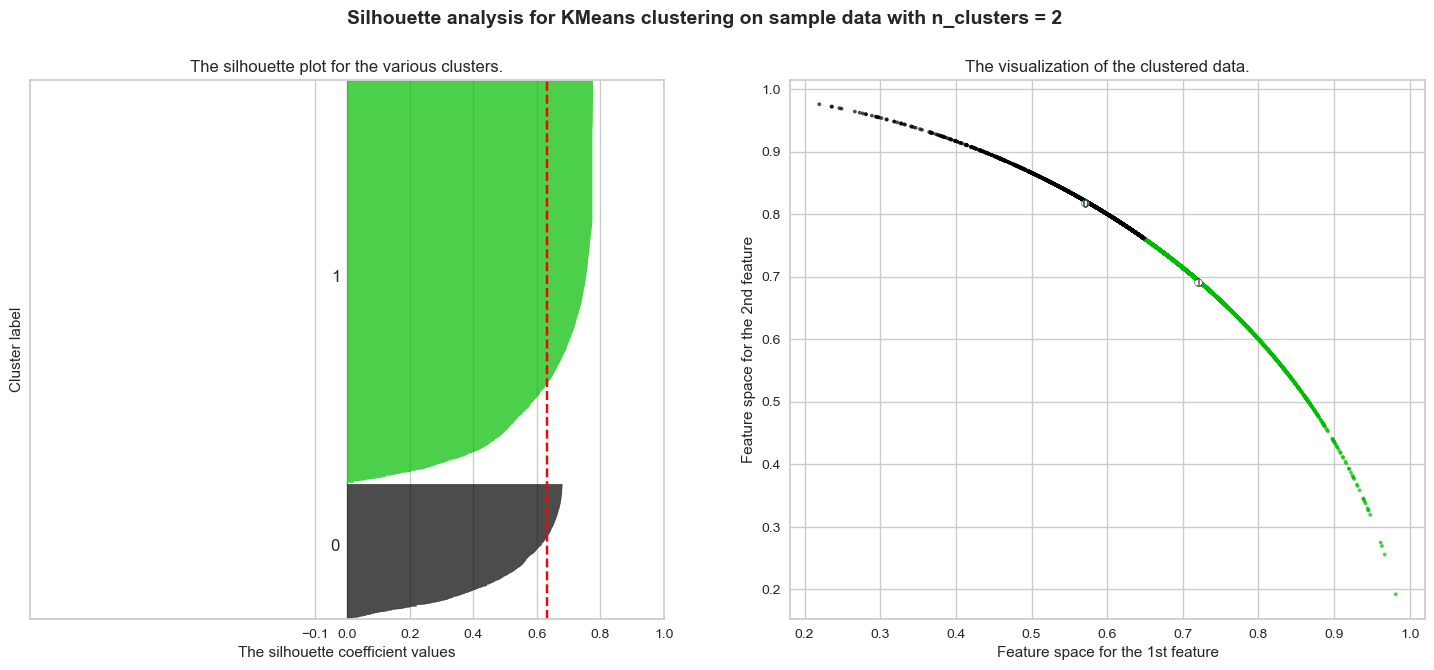

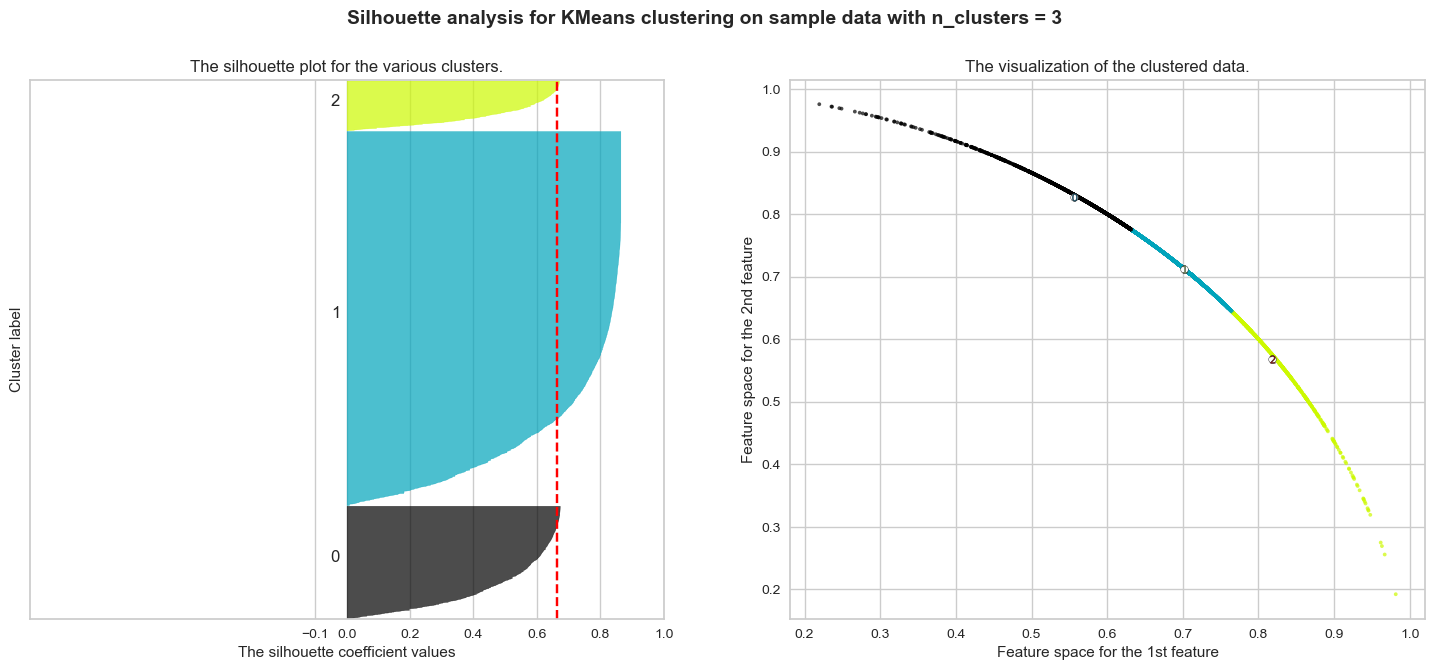

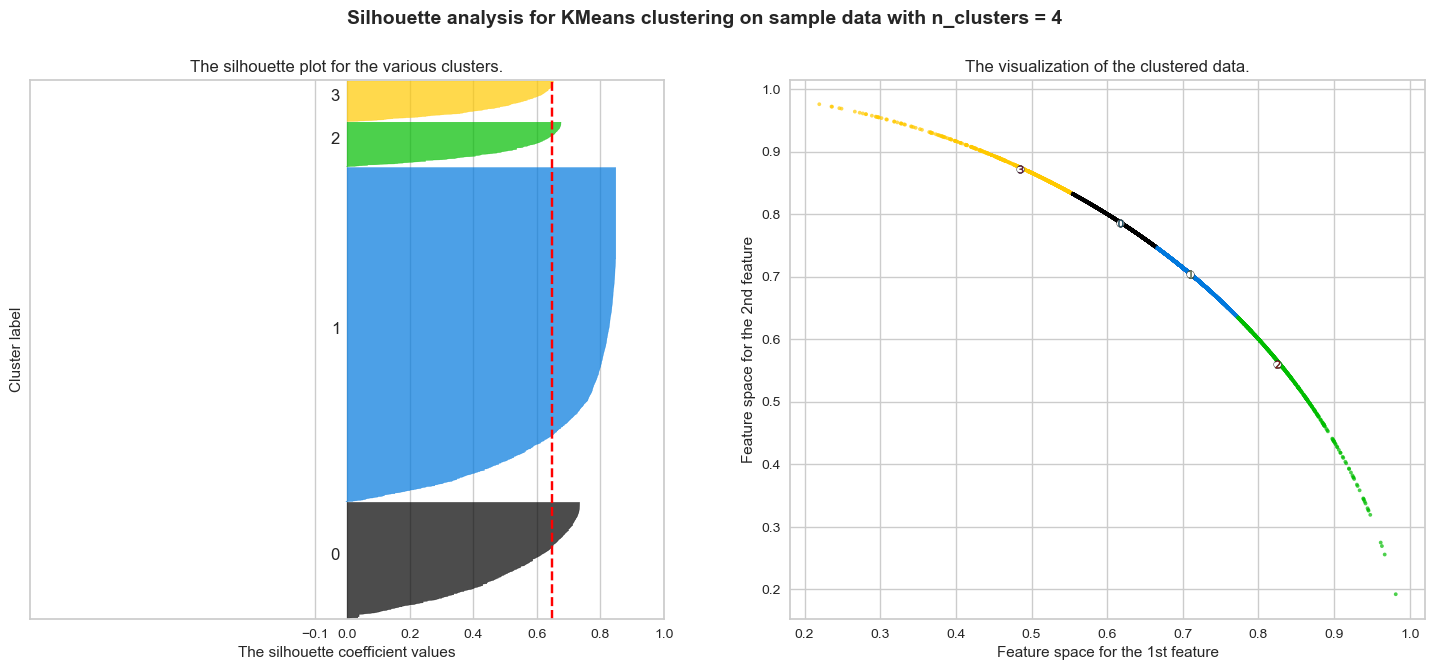

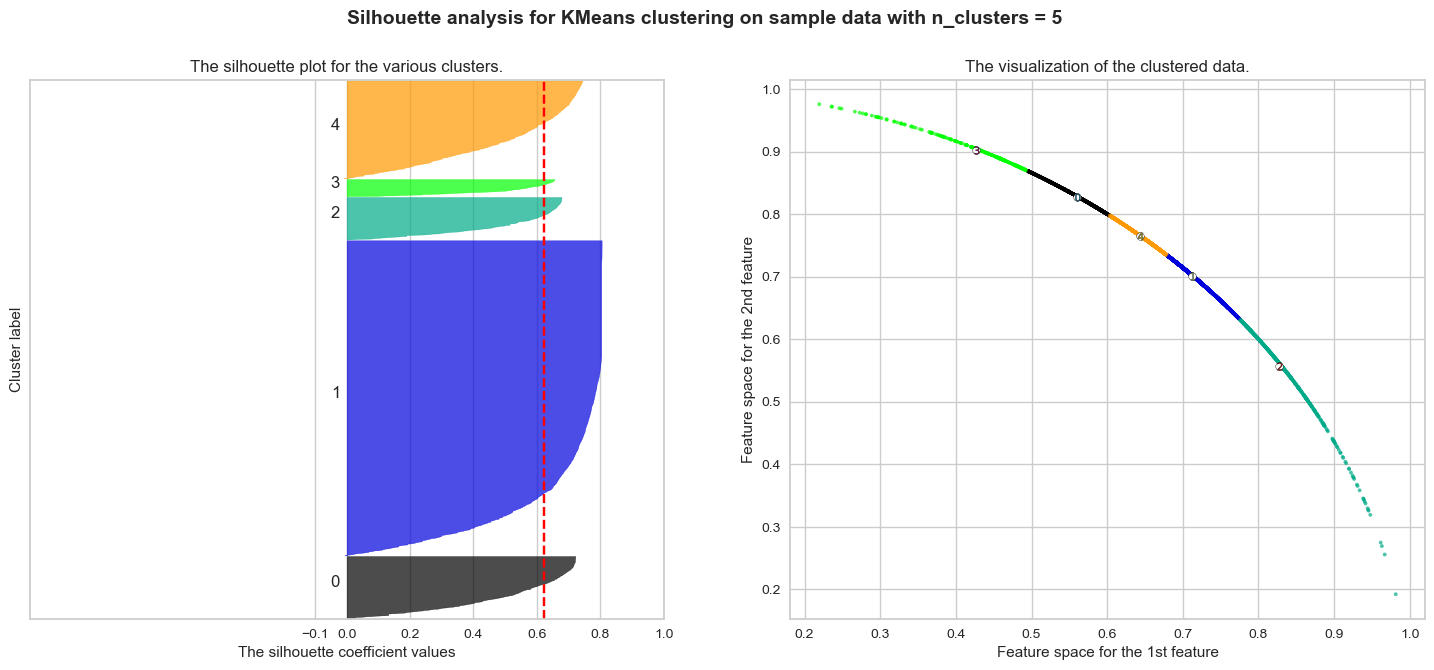

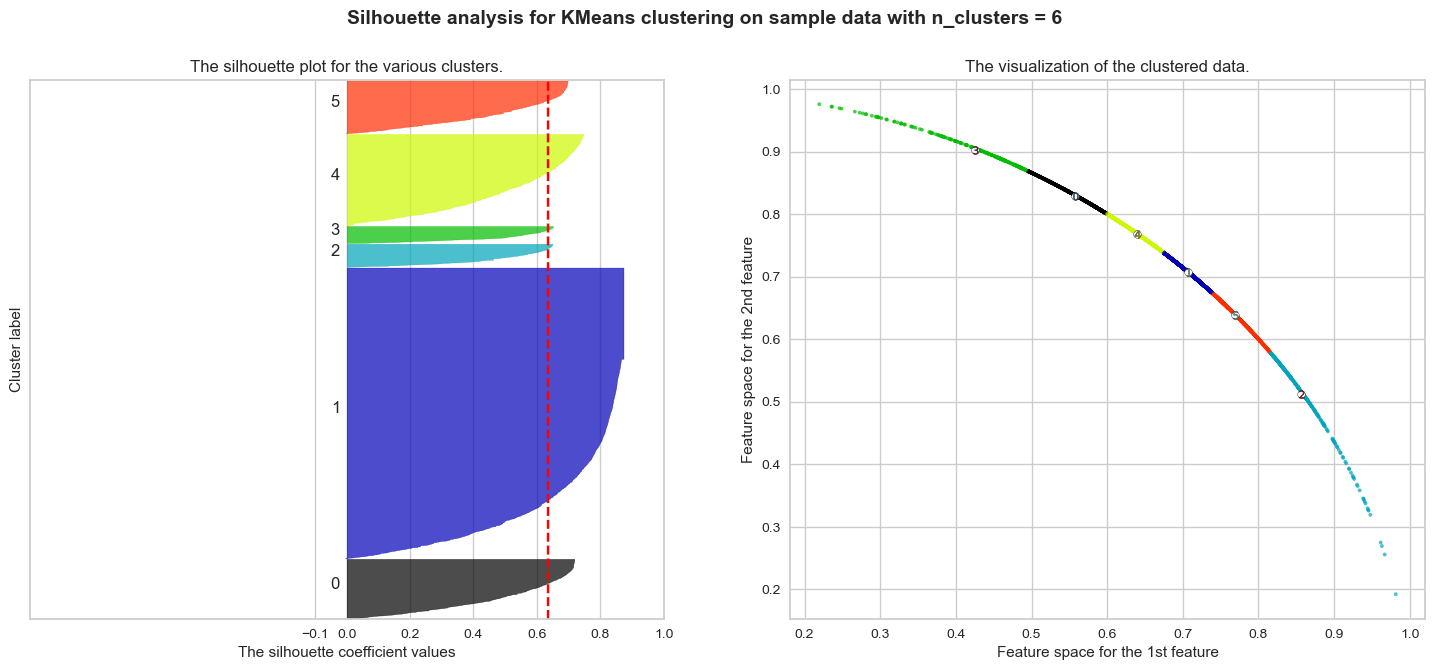

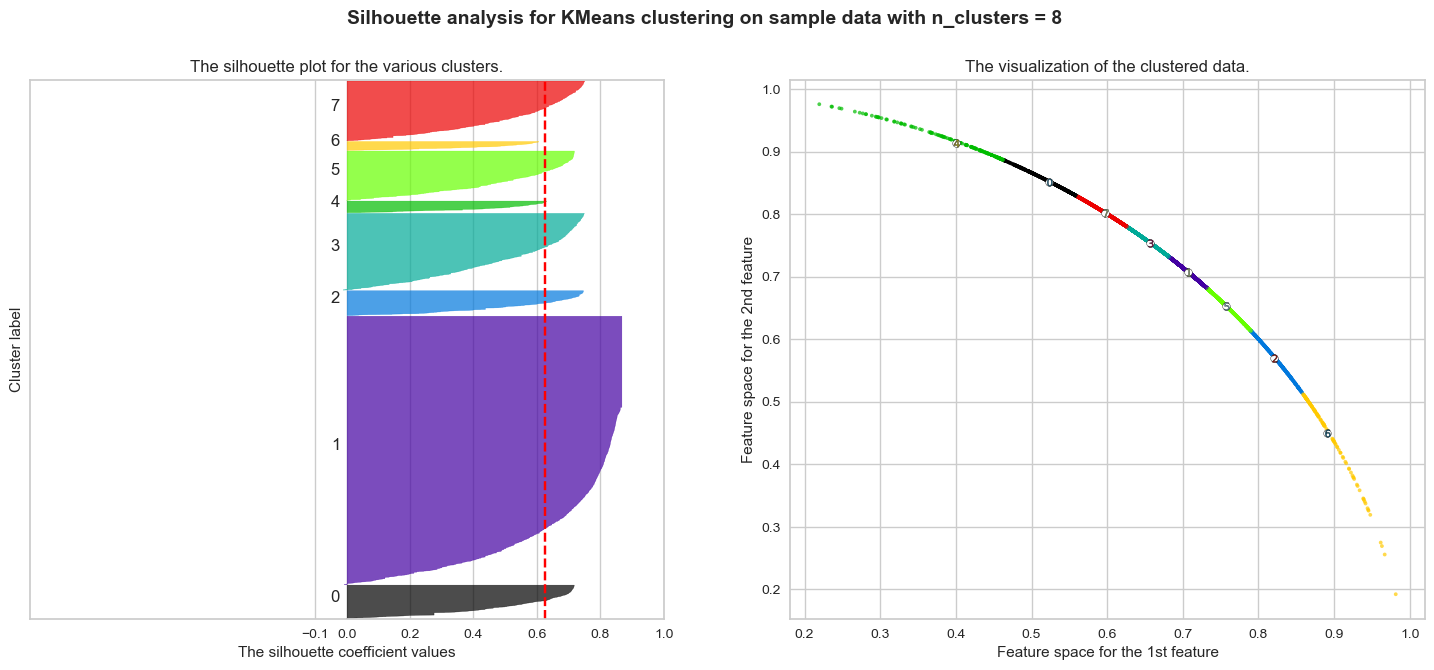

In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 'auto')
    cluster_labels = clusterer.fit_predict(X_train_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_norm[:, 0], X_train_norm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=30, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=30, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\anaconda3\envs\F21DSML\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


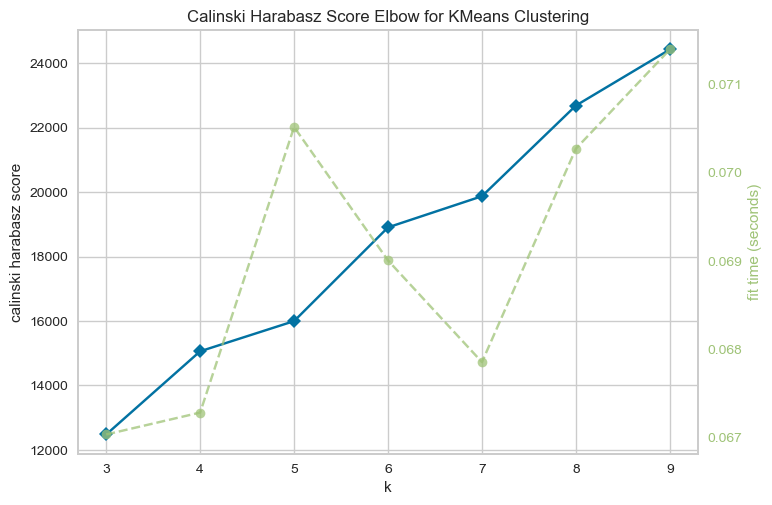

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [49]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init = 'auto')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,10),metric='calinski_harabasz', timings= True)
visualizer.fit(X_train_norm)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

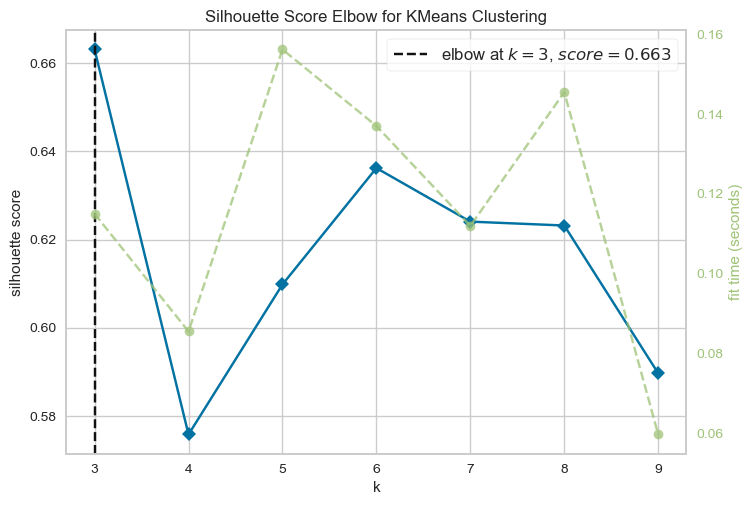

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init = 'auto')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,10),metric='silhouette', timings= True)
visualizer.fit(X_train_norm)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

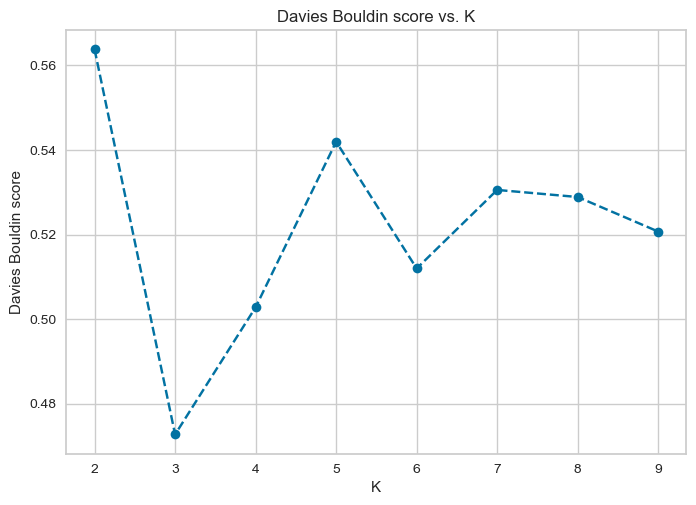

In [51]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center,n_init = 'auto')
    model = kmeans.fit_predict(X_train_norm)
    score = davies_bouldin_score(X_train_norm, model)
    return score
scores = []
centers = list(range(2,10))
for center in centers:
    scores.append(get_kmeans_score(X_train_norm, center))   
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [52]:
#A lower value of DB score indicate a better clustering

In [53]:
#First lets do dimensionality reduction with PCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA for dimensionality reduction


In [54]:
pca = PCA(n_components=71)
X_pca = pca.fit_transform(XTArr)

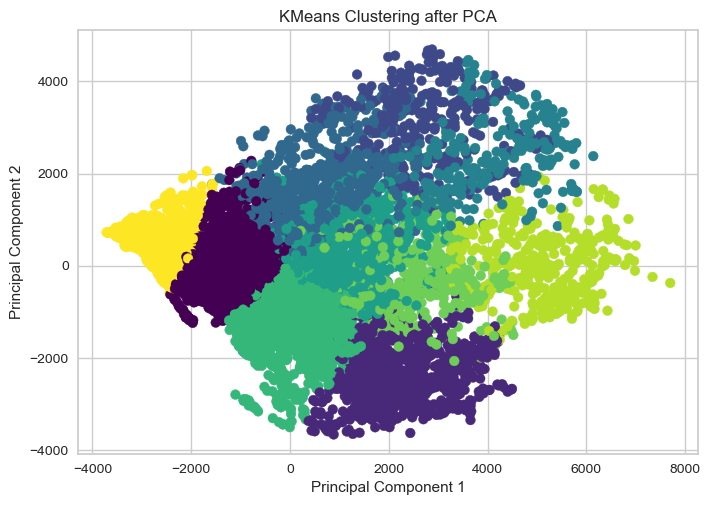

In [55]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init = 'auto')  # You can set the number of clusters (k) as required
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [56]:
from sklearn.metrics import silhouette_score
labels = kmeans.predict(X_pca)
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1712863471204918


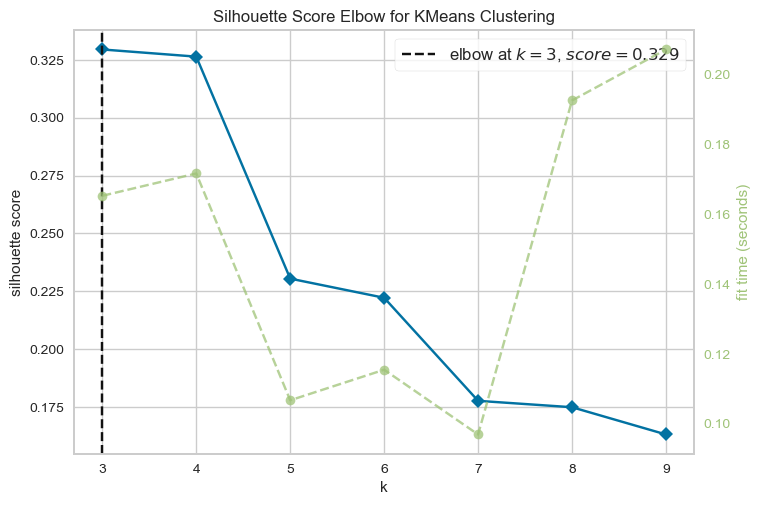

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
# Silhouette Score for K means
model = KMeans(n_init = 'auto')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,10),metric='silhouette', timings= True)
visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()  

# Extended Learning - Gaussian Mixture Models


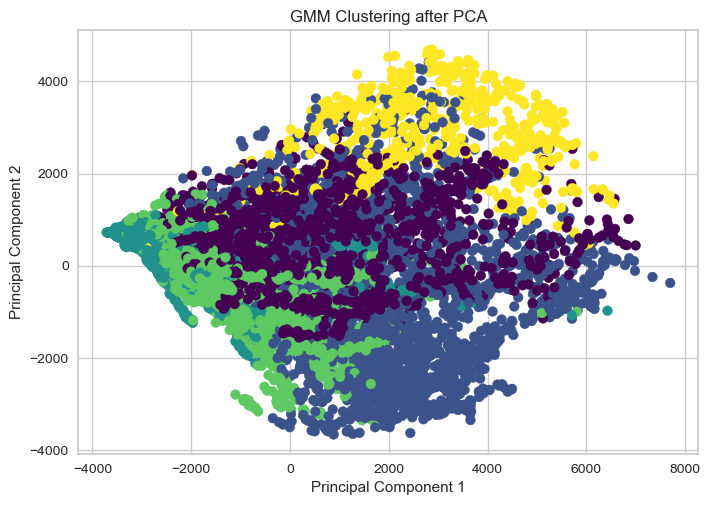

In [58]:
from sklearn import mixture
from matplotlib import colors 

# fit a Gaussian Mixture Model with 5 components
clf = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf.fit(X_pca)

y_clf = clf.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clf, cmap='viridis')
plt.title('GMM Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Niya\AppData\Local\Temp\ipykernel_17980\262717760.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


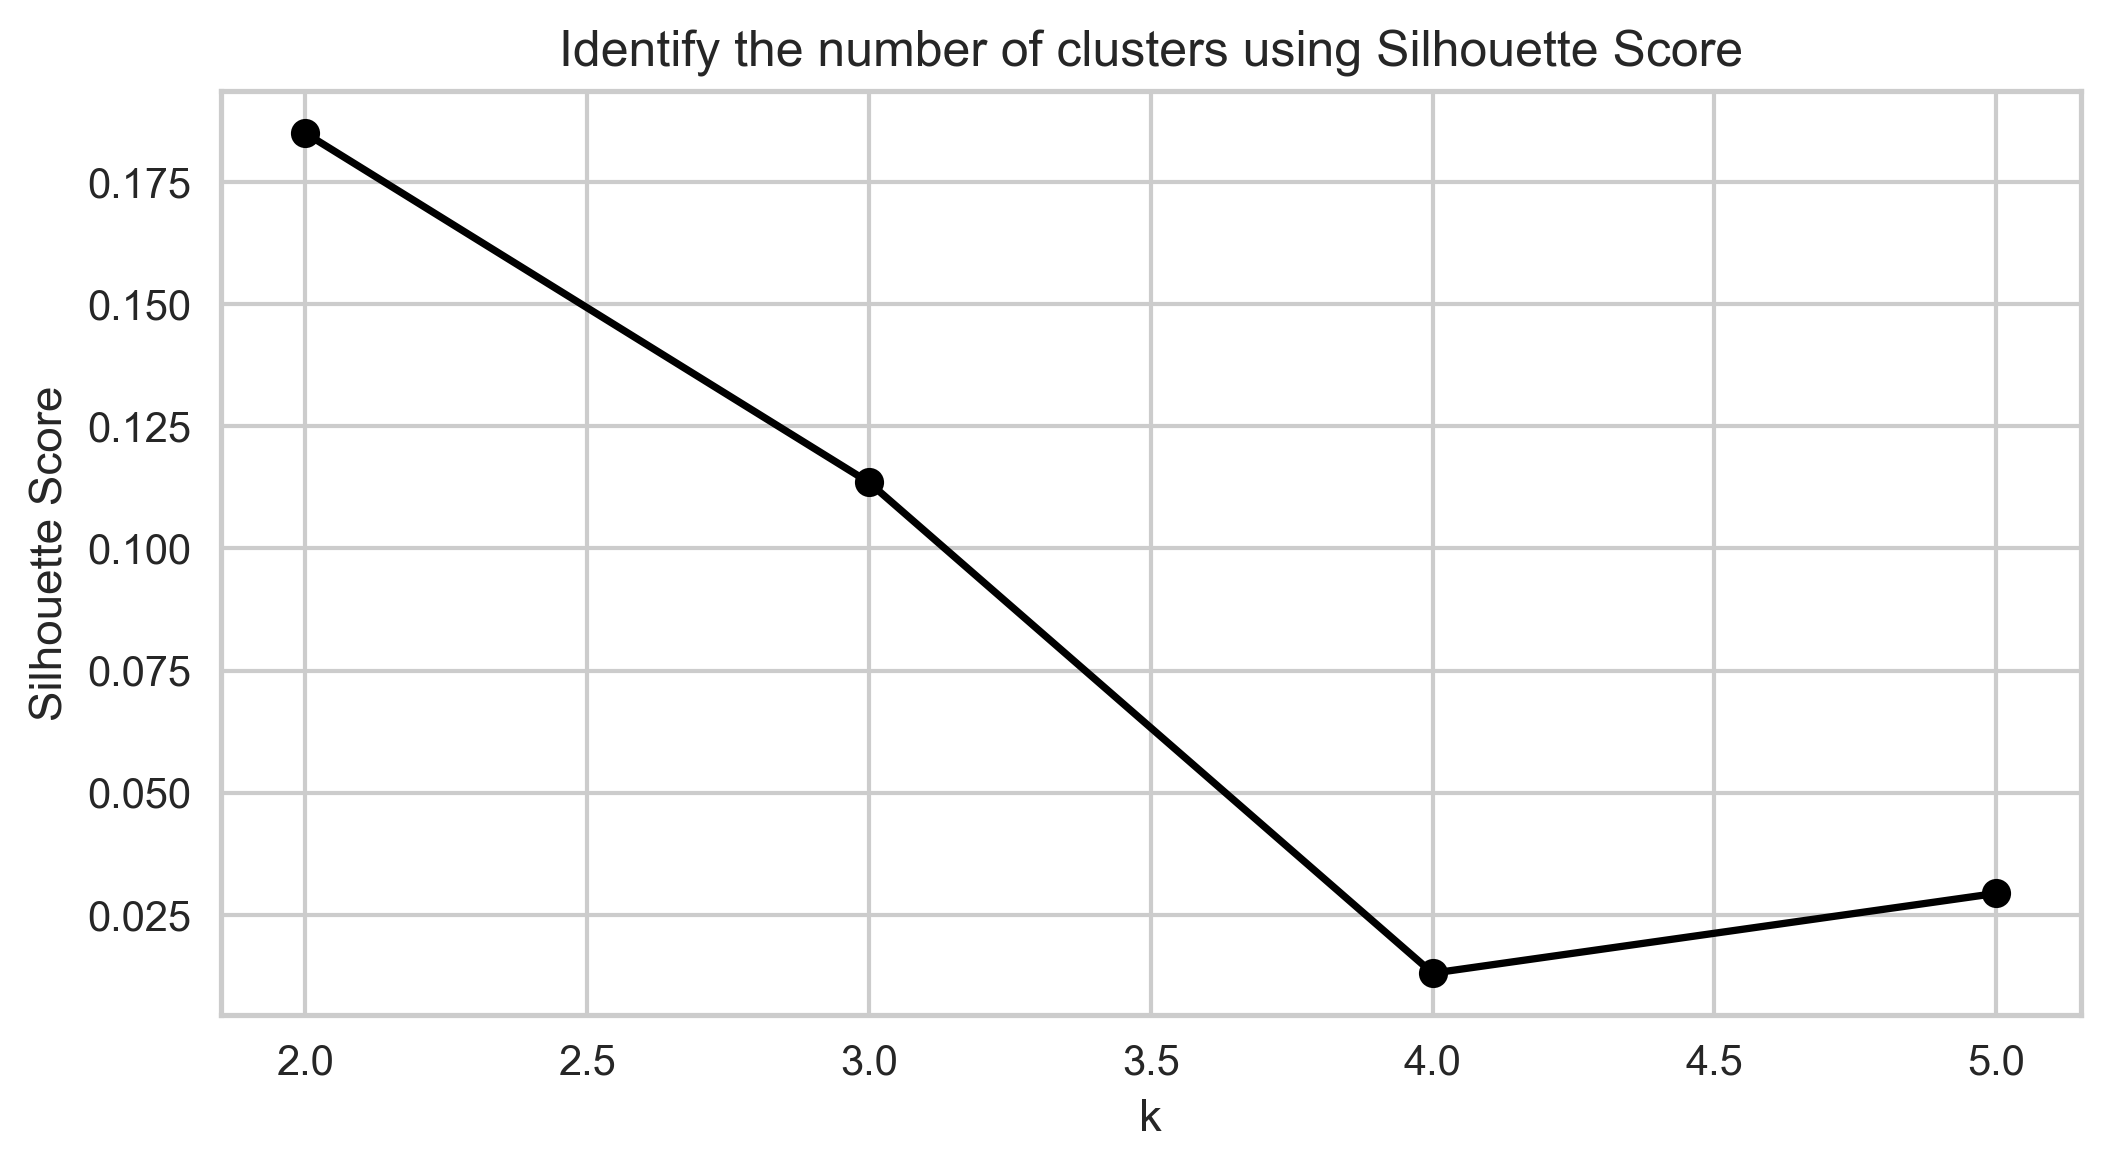

In [62]:
import sklearn.metrics as metrics
# Create empty list
S=[]
# Range of clusters to try (2 to 10)
K=range(2,6)

for k in K:
    # Set the model and its parameters
    model = mixture.GaussianMixture(n_components=k, covariance_type='full')
    # Fit the model 
    labels = model.fit_predict(X_pca)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X_pca, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(8,4), dpi=300)
plt.plot(K, S, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [133]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
clf.fit(X_pca)
y_clf = clf.predict(X_pca)

sklearn.metrics.calinski_harabasz_score(X_pca, y_clf)

1494.4903315887593

In [134]:
sklearn.metrics.davies_bouldin_score(X_pca, y_clf)

3.2884913990352036

In [135]:
sklearn.metrics.silhouette_score(X_pca, y_clf) 

0.01717176892890986

In [136]:
ylabelsArr = YTArr[:,0]

In [137]:
sklearn.metrics.adjusted_rand_score(ylabelsArr, y_clf) 

0.05888083513976533

# Observations - Gaussian Mixture Models

#The GMM was not converging when the number of clusters was set as 6. So Based on GMM, we need to assume a cluster size <=5.